In [29]:
model_path = '/Users/alinameyer/Documents/Master Ol/03 Medienverarbeitung/LineArt/dokumentary/pose_landmarker_lite.task'

In [30]:
import mediapipe as mp
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageOps
import sys
from segment_anything import SamPredictor, sam_model_registry

BaseOptions = mp.tasks.BaseOptions
PoseLandmarker = mp.tasks.vision.PoseLandmarker
PoseLandmarkerOptions = mp.tasks.vision.PoseLandmarkerOptions
VisionRunningMode = mp.tasks.vision.RunningMode

options = PoseLandmarkerOptions(
    base_options=BaseOptions(model_asset_path=model_path),
    running_mode=VisionRunningMode.IMAGE)

with PoseLandmarker.create_from_options(options) as landmarker:
  # The landmarker is initialized. Use it here.
  # Load the input image from an image file.
  mp_image = mp.Image.create_from_file('pictures/woman.jpg') 
  print(mp_image.width) 
  # Perform pose landmarking on the provided single image.
  # The pose landmarker must be created with the image mode.
  pose_landmarker_result = landmarker.detect(mp_image)

print(pose_landmarker_result.pose_landmarks)




1280
[[NormalizedLandmark(x=0.47445955872535706, y=0.2669007182121277, z=-0.07821159064769745, visibility=0.9950987696647644, presence=0.9933723211288452), NormalizedLandmark(x=0.4744380712509155, y=0.2514507472515106, z=-0.06303204596042633, visibility=0.9944243431091309, presence=0.9930450320243835), NormalizedLandmark(x=0.4737934470176697, y=0.25114935636520386, z=-0.06309083104133606, visibility=0.9925397038459778, presence=0.9934914708137512), NormalizedLandmark(x=0.472928524017334, y=0.2506415843963623, z=-0.06316454708576202, visibility=0.9944029450416565, presence=0.9937790036201477), NormalizedLandmark(x=0.4721528887748718, y=0.24724000692367554, z=-0.09892791509628296, visibility=0.9931817650794983, presence=0.9926732182502747), NormalizedLandmark(x=0.4689275622367859, y=0.24627891182899475, z=-0.09906132519245148, visibility=0.9915025234222412, presence=0.992697536945343), NormalizedLandmark(x=0.46663233637809753, y=0.24517890810966492, z=-0.09913676977157593, visibility=0.9

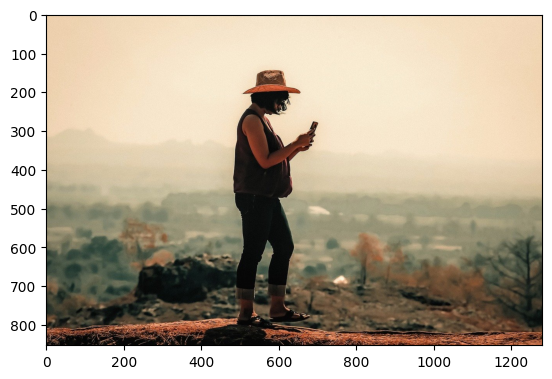

In [31]:
array = mp_image.numpy_view()
mg = Image.fromarray(array)
plt.imshow(mg)
plt.show()

In [33]:
from PIL import Image
from skimage import io

img = io.imread('pictures/woman.jpg')
im =Image.open('pictures/woman.jpg')
width, height = im.size


plt.imshow(im)
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'height'

In [ ]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))  

In [ ]:
print(pose_landmarker_result)
print(pose_landmarker_result.pose_world_landmarks)
print(pose_landmarker_result.pose_landmarks)

pose = 27

nose = pose_landmarker_result.pose_landmarks[0][0]
print(pose_landmarker_result.pose_landmarks[0][pose].x)
print(pose_landmarker_result.pose_landmarks[0][pose].y)

x=pose_landmarker_result.pose_landmarks[0][pose].x * width
y=pose_landmarker_result.pose_landmarks[0][pose].y * height

print(height)
print(width)

print(x)
print(y)




PoseLandmarkerResult(pose_landmarks=[[NormalizedLandmark(x=0.47445955872535706, y=0.2669007182121277, z=-0.07821159064769745, visibility=0.9950987696647644, presence=0.9933723211288452), NormalizedLandmark(x=0.4744380712509155, y=0.2514507472515106, z=-0.06303204596042633, visibility=0.9944243431091309, presence=0.9930450320243835), NormalizedLandmark(x=0.4737934470176697, y=0.25114935636520386, z=-0.06309083104133606, visibility=0.9925397038459778, presence=0.9934914708137512), NormalizedLandmark(x=0.472928524017334, y=0.2506415843963623, z=-0.06316454708576202, visibility=0.9944029450416565, presence=0.9937790036201477), NormalizedLandmark(x=0.4721528887748718, y=0.24724000692367554, z=-0.09892791509628296, visibility=0.9931817650794983, presence=0.9926732182502747), NormalizedLandmark(x=0.4689275622367859, y=0.24627891182899475, z=-0.09906132519245148, visibility=0.9915025234222412, presence=0.992697536945343), NormalizedLandmark(x=0.46663233637809753, y=0.24517890810966492, z=-0.09

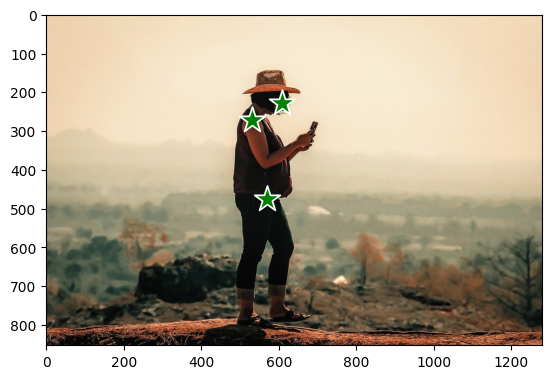

In [ ]:
nose = pose_landmarker_result.pose_landmarks[0][0]
nose_x = pose_landmarker_result.pose_landmarks[0][0].x * width
nose_y = pose_landmarker_result.pose_landmarks[0][0].y * height

shoulder = pose_landmarker_result.pose_landmarks[0][12]
shoulder_x = shoulder.x * width
shoulder_y = shoulder.y * height

hip = pose_landmarker_result.pose_landmarks[0][23]
hip_x =hip.x * width
hip_y = hip.y * height

input_point = np.array([[nose_x, nose_y], [shoulder_x,shoulder_y], [hip_x, hip_y]])
input_label = np.array([1,1,1])

plt.imshow(im)
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show()  

In [ ]:
import torch
from segment_anything import SamPredictor, sam_model_registry

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

predictor.set_image(img)



plt.figure(figsize=(10,10))
plt.imshow(mg)
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show()  

AttributeError: 'JpegImageFile' object has no attribute 'shape'

In [ ]:
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)

masks.shape 

best_mask = masks
currentScore = 0

for i, (mask, score) in enumerate(zip(masks, scores)):
    #plt.figure(figsize=(10,10))
    plt.imshow(mg)
    show_mask(mask, plt.gca())
    #show_points(input_point, input_label, plt.gca())
    #plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()
    if (score > currentScore):
        currentScore = score
        best_mask = mask

segment_img = img